In [1]:
#!/usr/bin/env python3
"""
Script to plot player strategies over rounds from prisoner's dilemma log.
"""

import json
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

def load_log_data(log_file_path):
    """Load and parse the prisoner's dilemma log file."""
    with open(log_file_path, 'r') as f:
        data = json.load(f)
    return data


Matplotlib is building the font cache; this may take a moment.


In [2]:
def extract_policy_data(data):
    """Extract policy data for each player across all rounds."""
    round_history = data['round_history']
    
    rounds = []
    alice_cooperate_prob = []
    alice_defect_prob = []
    bob_cooperate_prob = []
    bob_defect_prob = []
    
    for round_data in round_history:
        round_num = round_data['round']
        policies = round_data['policies']
        
        rounds.append(round_num)
        
        # Alice's policy: [cooperate_prob, defect_prob]
        alice_policy = policies['Alice']
        alice_cooperate_prob.append(alice_policy[0])
        alice_defect_prob.append(alice_policy[1])
        
        # Bob's policy: [cooperate_prob, defect_prob]
        bob_policy = policies['Bob']
        bob_cooperate_prob.append(bob_policy[0])
        bob_defect_prob.append(bob_policy[1])
    
    return {
        'rounds': rounds,
        'alice_cooperate': alice_cooperate_prob,
        'alice_defect': alice_defect_prob,
        'bob_cooperate': bob_cooperate_prob,
        'bob_defect': bob_defect_prob
    }

def plot_strategies(policy_data, output_file=None):
    """Create plots showing strategy evolution for both players."""
    
    rounds = policy_data['rounds']
    
    # Create figure with subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 10))
    
    # Plot Alice's strategy
    ax1.plot(rounds, policy_data['alice_cooperate'], 'g-', label='Cooperate', linewidth=2, marker='o', markersize=4)
    ax1.plot(rounds, policy_data['alice_defect'], 'r-', label='Defect', linewidth=2, marker='s', markersize=4)
    ax1.set_title('Alice\'s Strategy Evolution', fontsize=14, fontweight='bold')
    ax1.set_xlabel('Round')
    ax1.set_ylabel('Probability')
    ax1.set_ylim(-0.1, 1.1)
    ax1.grid(True, alpha=0.3)
    ax1.legend()
    ax1.set_xticks(range(0, max(rounds)+1, 5))
    
    # Plot Bob's strategy
    ax2.plot(rounds, policy_data['bob_cooperate'], 'g-', label='Cooperate', linewidth=2, marker='o', markersize=4)
    ax2.plot(rounds, policy_data['bob_defect'], 'r-', label='Defect', linewidth=2, marker='s', markersize=4)
    ax2.set_title('Bob\'s Strategy Evolution', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Round')
    ax2.set_ylabel('Probability')
    ax2.set_ylim(-0.1, 1.1)
    ax2.grid(True, alpha=0.3)
    ax2.legend()
    ax2.set_xticks(range(0, max(rounds)+1, 5))
    
    plt.tight_layout()
    
    if output_file:
        plt.savefig(output_file, dpi=300, bbox_inches='tight')
        print(f"Plot saved to: {output_file}")
    
    plt.show()

def analyze_convergence(policy_data):
    """Analyze when each player's strategy converges."""
    rounds = policy_data['rounds']
    
    print("\n=== CONVERGENCE ANALYSIS ===")
    
    # Alice's convergence analysis
    alice_cooperate = policy_data['alice_cooperate']
    alice_defect = policy_data['alice_defect']
    
    print(f"\nAlice's Strategy:")
    print(f"  Final Cooperate Probability: {alice_cooperate[-1]:.3f}")
    print(f"  Final Defect Probability: {alice_defect[-1]:.3f}")
    
    # Check if Alice's strategy is stable in the last 10 rounds
    last_10_rounds = 10
    if len(alice_cooperate) >= last_10_rounds:
        alice_last_10_cooperate = alice_cooperate[-last_10_rounds:]
        alice_last_10_defect = alice_defect[-last_10_rounds:]
        
        alice_cooperate_std = np.std(alice_last_10_cooperate)
        alice_defect_std = np.std(alice_last_10_defect)
        
        print(f"  Standard deviation in last {last_10_rounds} rounds:")
        print(f"    Cooperate: {alice_cooperate_std:.3f}")
        print(f"    Defect: {alice_defect_std:.3f}")
        
        if alice_cooperate_std < 0.1 and alice_defect_std < 0.1:
            print("  Status: CONVERGED (stable in last 10 rounds)")
        else:
            print("  Status: NOT CONVERGED (still oscillating)")
    
    # Bob's convergence analysis
    bob_cooperate = policy_data['bob_cooperate']
    bob_defect = policy_data['bob_defect']
    
    print(f"\nBob's Strategy:")
    print(f"  Final Cooperate Probability: {bob_cooperate[-1]:.3f}")
    print(f"  Final Defect Probability: {bob_defect[-1]:.3f}")
    
    # Check if Bob's strategy is stable
    bob_cooperate_std = np.std(bob_cooperate)
    bob_defect_std = np.std(bob_defect)
    
    print(f"  Standard deviation across all rounds:")
    print(f"    Cooperate: {bob_cooperate_std:.3f}")
    print(f"    Defect: {bob_defect_std:.3f}")
    
    if bob_cooperate_std < 0.01 and bob_defect_std < 0.01:
        print("  Status: CONVERGED (stable from round 1)")
    else:
        print("  Status: NOT CONVERGED")


Loading data from: /Users/kabirmanghnani/Documents/work/sanmi/llm_games/simple_games/prisoners_dilemma_log.json

Experiment Info:
  Rounds: 50
  Players: ['Alice', 'Bob']
  Sequential: False

=== CONVERGENCE ANALYSIS ===

Alice's Strategy:
  Final Cooperate Probability: 0.250
  Final Defect Probability: 0.250
  Standard deviation in last 10 rounds:
    Cooperate: 0.071
    Defect: 0.000
  Status: CONVERGED (stable in last 10 rounds)

Bob's Strategy:
  Final Cooperate Probability: 0.950
  Final Defect Probability: 0.030
  Standard deviation across all rounds:
    Cooperate: 0.250
    Defect: 0.222
  Status: NOT CONVERGED


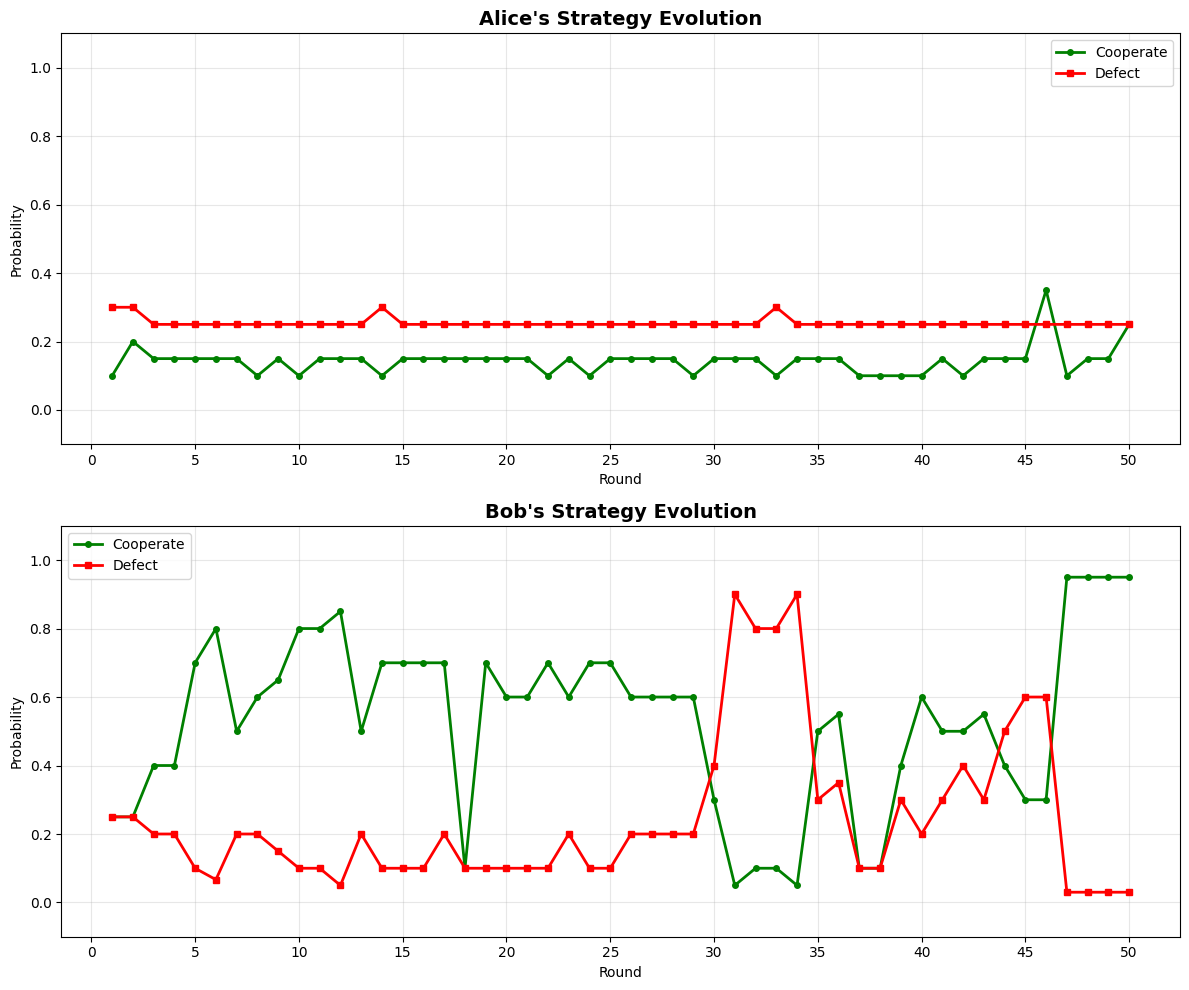

In [12]:
log_file = "/Users/kabirmanghnani/Documents/work/sanmi/llm_games/simple_games/prisoners_dilemma_log.json"
log_file = Path(log_file)

if not log_file.exists():
    print(f"Error: Log file not found at {log_file}")
    assert False

print(f"Loading data from: {log_file}")

# Load and process data
data = load_log_data(log_file)
policy_data = extract_policy_data(data)

# Print experiment info
exp_info = data['experiment_info']
print(f"\nExperiment Info:")
print(f"  Rounds: {exp_info['num_rounds']}")
print(f"  Players: {exp_info['players']}")
print(f"  Sequential: {exp_info['sequential']}")

# Analyze convergence
analyze_convergence(policy_data)

# Create plots
# output_file = script_dir / "strategy_evolution.png"
plot_strategies(policy_data)
